In [290]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

Atsisiunciu faila.
Pasitikrinu is ko susideda, kokie duomenys pateikti.
Pasitikrinu ar yra nepateiktu reiksmiu. Jeigu yra, istrinu, prasivalau duomenys.

In [24]:
df_wine = pd.read_csv("winequality-red.csv")

In [25]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [47]:
# Noriu, kad "quality" butu priekyje

quality_col = df_wine.pop("quality")
df_wine.insert(0, "quality", quality_col)
df_wine.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,5,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,5,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,6,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [48]:
df_wine.shape

(1599, 12)

In [49]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               1599 non-null   int64  
 1   fixed acidity         1599 non-null   float64
 2   volatile acidity      1599 non-null   float64
 3   citric acid           1599 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [50]:
df_wine.isnull().sum()

quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [51]:
df_wine.isna().sum()

quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [52]:
df_wine.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,5.636023,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,0.807569,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,3.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,5.000000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,6.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,6.000000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,8.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


Duomenys atrodo tvarkingi, viskas uzpildyta, nera tusciu reiksmiu.
Su tvarkingais duomenimis galima dirbti toliau.

Toliau: noreciau sukurti modeli, pagal kuri galima butu nuspeti vyno kokybe, bet kokios savybes labiausiai itakoja vyno kokybe?

In [53]:
df_wine["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Is cia matau, kad sitos rusies vyno "Kokybe" svyruoja nuo 3 iki 8, nors skale yra nuo 1 iki 10.

In [54]:
df_wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

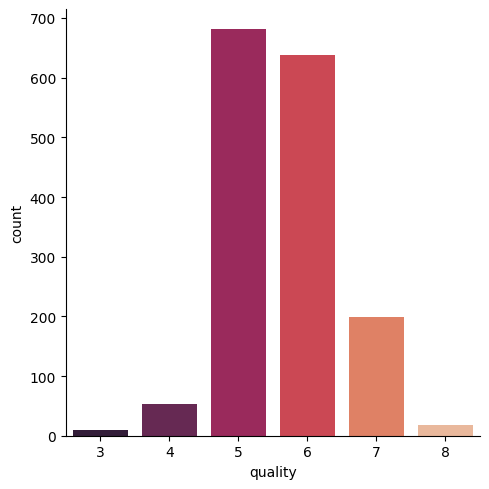

In [55]:
sns.catplot(x="quality", data=df_wine, kind="count", palette="rocket")

Is histogramos galima matyti, kad sitos rusies vyno kokybe svyruoja nuo 3 iki 8, bet daugiausia yra pagaminta geros kokybes vyno. 

Is interneto gelmiu, kaip vyno kritikai vertina kokybe:

Jeigu kokybe > 7 - vynas yra puikus.

Jeigu 5 < kokybe < 7 - vynas yra geras.

Jeigu kokybe < 5 - vynas yra blogas.

Is pradziu reiketu pamatyti, kaip vyno kokybe koreliuoja su vyno cheminemis ir fizinemis savybemis.

In [67]:
df_corr_full = df_wine.corr()
df_corr_full

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,1.000000,0.124052,-0.390558,0.226373,0.013732,-0.128907,-0.050656,-0.185100,-0.174919,-0.057731,0.251397,0.476166
fixed acidity,0.124052,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.390558,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.226373,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.013732,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,-0.128907,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.050656,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.185100,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,-0.174919,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.057731,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633


<Axes: >

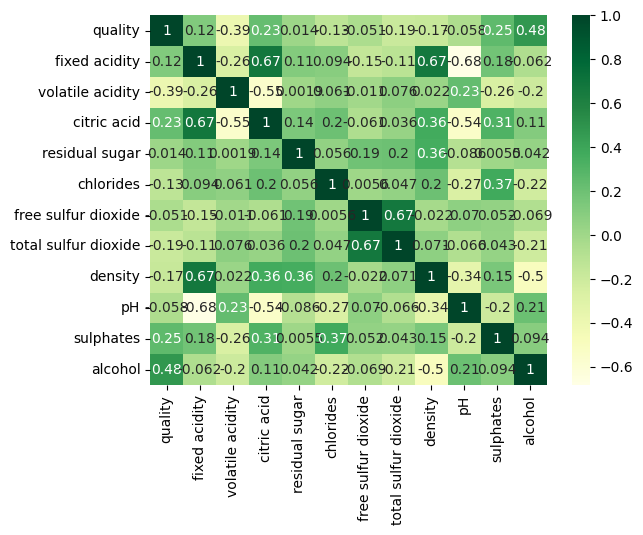

In [70]:
sns.heatmap(df_corr_full, annot=True, cmap="YlGn")

Matome, kad:
- Stipri neigiama koreliacija tarp pH ir fiksuoto rugstingumo. Kas yra logiska, nes kuo labiau rugstus tirpalas, tuo mazesnis pH.
- Stipri teigiama koreliacija tarp fiksuoto rugstingumo ir tankio. Tankis yra susijes su tirpalo koncentracija, o fiksuotas rugstingumas - komponentas prisededantis prie koncetracijos.
- Stipri teigiama koreliacija tarp tankio ir citrinos rugsties. Citrinu rugstis yra organine ir prisideda prie tirpalo koncentracijos.

In [69]:
df_corr_quality = df_wine.corr()["quality"]
df_corr_quality.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Is cia matome, kad:
 - Aukstesne alkoholio koncetracija siejasi su aukstesne vyno kokybe, nes tai padaro vyno skoni labiau kompleksini ir sodresni.
- Taip pat yra teigiama koreliacija tarp sulfatu kiekio ir kokybes, tarp citrinu rugsties kiekio ir kokybes.
- Sulfatai tai konservantai, kurie neleidzia kenksmingoms bakterijoms daugintis ir oksiduoti vyno - jo gadinti.
- Citrinu rugstis - tai organine rugstis randame vynuogese ir kartais naudojama vyno gamyboje, sureguliuoti vyno rugstuma. Citrinu rugstis gali sustiprinti vaisini ir gaivu vyno pobudi, taip pat padeti islaikyti vyno spalva ir skoni laikui begant.
- Zemiausia koreliacija kokybe turi su lengvai isgaruojanciomis rugstimis. Kuo didesne ju koncentracija, tuo labiau vynas linkes tureti nemalonu acto skoni ir kvapa.

Text(0.5, 0.98, 'Relationship between wine features and quality')

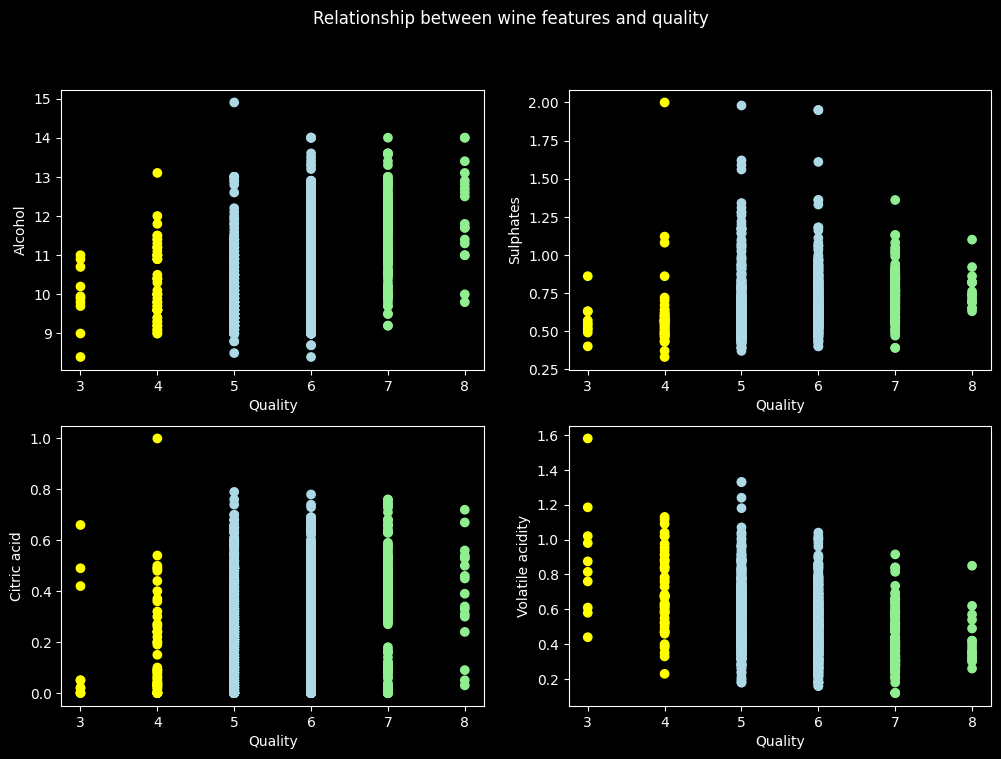

In [242]:
colours = np.where(df_wine['quality'] < 5, 'yellow',
                  np.where(df_wine['quality'] > 6, 'lightgreen', 'lightblue'))

# Quality vs alcohol
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs[0, 0].scatter(df_wine["quality"], df_wine["alcohol"], c=colours)
axs[0, 0].set_xlabel("Quality")
axs[0, 0].set_ylabel("Alcohol")

# Quality vs. sulphates
axs[0, 1].scatter(df_wine["quality"], df_wine["sulphates"], c=colours)
axs[0, 1].set_xlabel("Quality")
axs[0, 1].set_ylabel("Sulphates")

# Quality vs. citric acid
axs[1, 0].scatter(df_wine["quality"], df_wine["citric acid"], c=colours)
axs[1, 0].set_xlabel("Quality")
axs[1, 0].set_ylabel("Citric acid")

# Quality vs. volatile acidity
axs[1, 1].scatter(df_wine["quality"], df_wine["volatile acidity"], c=colours)
axs[1, 1].set_xlabel("Quality")
axs[1, 1].set_ylabel("Volatile acidity")

fig.suptitle("Relationship between wine features and quality")

Text(0.5, 0.98, 'Relationship between wine features and quality')

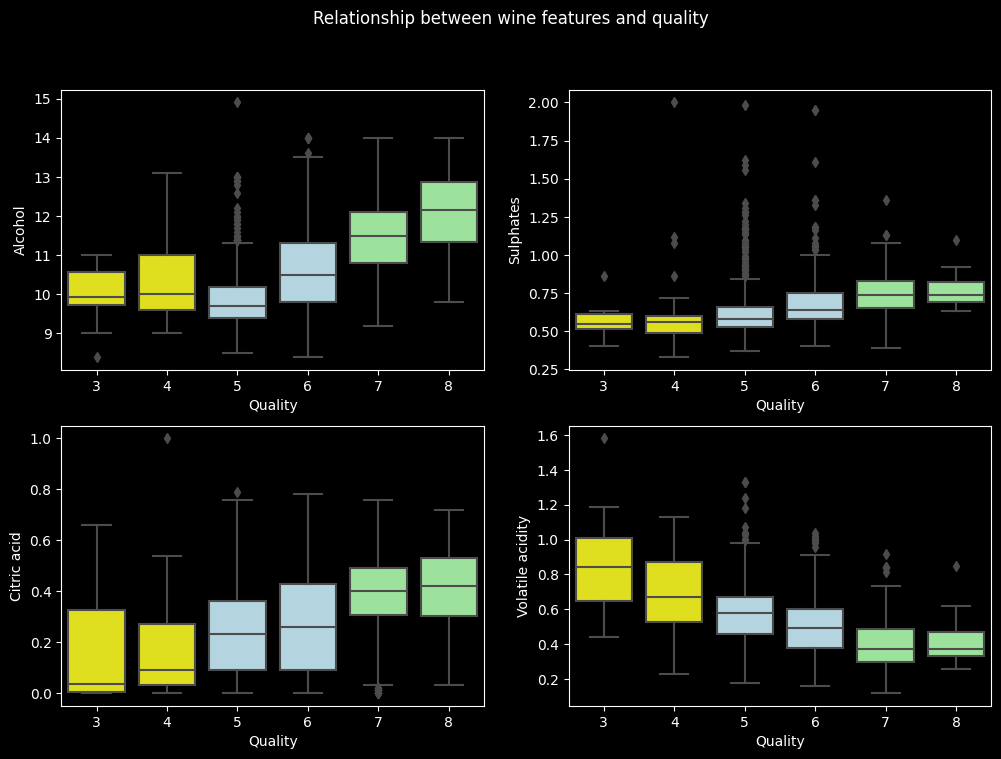

In [243]:

colors = {3: 'yellow', 4: 'yellow', 5: 'lightblue', 6: 'lightblue', 7: 'lightgreen', 8: 'lightgreen'}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Quality vs alcohol
sns.boxplot(x='quality', y='alcohol', data=df_wine, ax=axs[0, 0], palette=colors)
axs[0, 0].set_xlabel("Quality")
axs[0, 0].set_ylabel("Alcohol")

# Quality vs. sulphates
sns.boxplot(x='quality', y='sulphates', data=df_wine, ax=axs[0, 1], palette=colors)
axs[0, 1].set_xlabel("Quality")
axs[0, 1].set_ylabel("Sulphates")

# Quality vs. citric acid
sns.boxplot(x='quality', y='citric acid', data=df_wine, ax=axs[1, 0], palette=colors)
axs[1, 0].set_xlabel("Quality")
axs[1, 0].set_ylabel("Citric acid")

# Quality vs. volatile acidity
sns.boxplot(x='quality', y='volatile acidity', data=df_wine, ax=axs[1, 1], palette=colors)
axs[1, 1].set_xlabel("Quality")
axs[1, 1].set_ylabel("Volatile acidity")


fig.suptitle("Relationship between wine features and quality")

Modelio mokymas kaip nuspeti ar vynas bus geras

In [200]:
df_wine.columns.tolist()[1:]

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [201]:
y = df_wine["quality"] # tikslas!

In [202]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [203]:
X = df_wine[['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']]

In [204]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [205]:
# padalinu duomenys

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.33, random_state=42)

Is visu parinktu modeliu, noriu isitikinti kuris vis del to geresnis sitai situacijai.

RandomForestClassifier()

In [310]:
rfc_model = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)
rfc_model

RandomForestClassifier(n_estimators=1000)

In [311]:
prediction = rfc_model.predict(X_test)
accuracy_score(prediction, y_test)

0.6534090909090909

LogisticRegression()

In [312]:
logr_model = LogisticRegression(solver='newton-cg').fit(X_train, y_train)
logr_model

LogisticRegression(solver='newton-cg')

In [313]:
prediction = logr_model.predict(X_test)
r2_score(y_test, prediction)

0.20781267772704382

SVR()

In [258]:
svr_model = SVR().fit(X_train, y_train)
svr_model

SVR()

In [259]:
prediction = svr_model.predict(X_test)
r2_score(y_test, prediction)

0.16551881882989095

KNeighborsRegressor()

In [260]:
knn_model = KNeighborsRegressor(n_neighbors=7).fit(X_train, y_train)
knn_model

KNeighborsRegressor(n_neighbors=7)

In [231]:
prediction = knn_model.predict(X_test)
r2_score(y_test, prediction)

0.1736108232474186

LinearRegression()

In [263]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [264]:
ling_model = LinearRegression().fit(X_train_scaled, y_train)
ling_model

LinearRegression()

In [265]:
prediction = ling_model.predict(X_test_scaled)
r2_score(y_test, prediction)

0.35944431072490624

DecisionTreeClassifier()

In [291]:
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
dtc_model

DecisionTreeClassifier()

In [292]:
prediction = dtc_model.predict(X_test)
accuracy_score(prediction, y_test)

0.5587121212121212

Mano manymu, geriausias modelis yra RandomForestClassifier().
Drisciau teigti, del to, kad kiekvienas meginys turi daug skirtingu savybiu, kurios yra su savimi suristos.

In [314]:
with open("df_wine_quality_predictor_model.pickle", mode="wb") as f:
    pickle.dump(rfc_model, f)

In [315]:
del rfc_model

In [318]:
# issisaugojome modeli ateiciai, kad neuzimtu vietos